In [26]:
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns

import statsmodels.api as sm
from sklearn.cross_validation import train_test_split

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

# make plots appear when you call them
%matplotlib inline 

In [27]:
#samp = pd.read_csv("../projects/1stproject/sample_submission.csv")
#test = pd.read_csv("../projects/1stproject/test.csv")
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
# Just looking at train data set that was given to us
train.describe()

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,NaN,7553.500000,5.000000,5.000000,1954.000000,1967.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,NaN,9478.500000,6.000000,5.000000,1973.000000,1994.000000,NaN,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,NaN,11601.500000,7.000000,6.000000,2000.000000,2004.000000,NaN,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


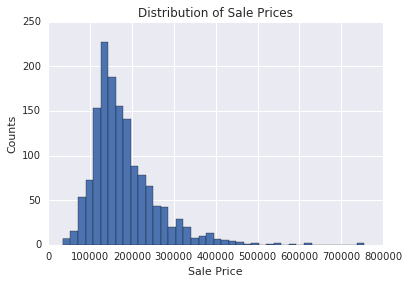

In [8]:
# A look at how housing prices are distributed - was just curious
plt.hist(train['SalePrice'], bins=40)
plt.title("Distribution of Sale Prices")
plt.xlabel("Sale Price")
plt.ylabel("Counts")
plt.show()

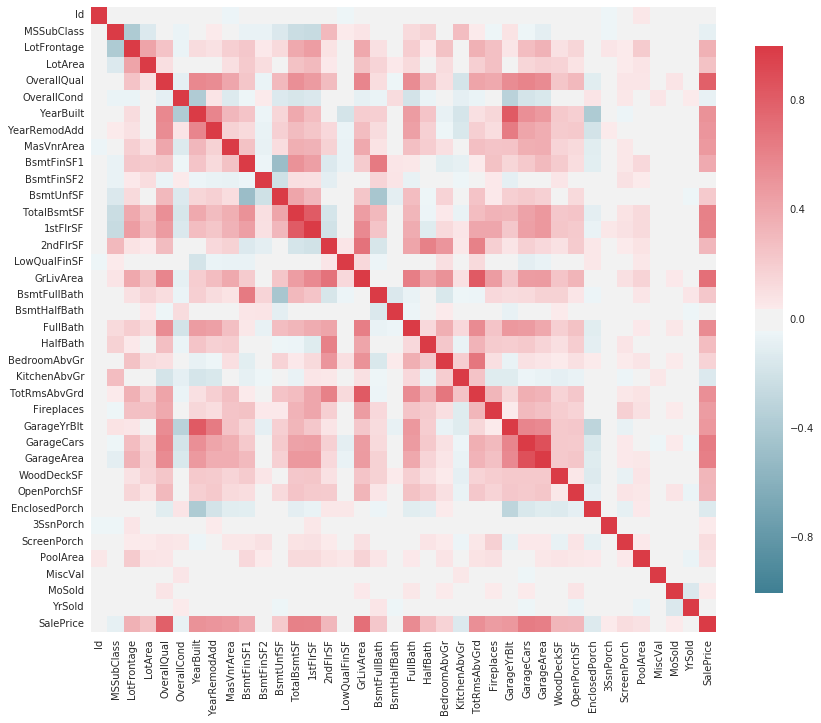

In [9]:
# Creating a correlation plot

sns.set(style="white")

# Generate a large random dataset

# Compute the correlation matrix
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmax=1,
            square=True, cbar_kws={"shrink": .7})

In [10]:
# Listing how attributes are correlated with salesprice - values that are most positively or negatively correlated 1st.
#salescorr['absvalue'] = salescorr[[0]].abs()

#sc = salescorr.sort_values('absvalue', ascending=0, axis = 0)
#sc = sc.drop(sc.index[[0]])
#sc = sc.drop('absvalue', axis = 1)
#sc.columns = ['corr with SalesPrice']
#sc

I want to take a look at some of the qualitative values which are not in the correlation. 

In [11]:
train.select_dtypes(include=['object']).columns.values

array(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'], dtype=object)

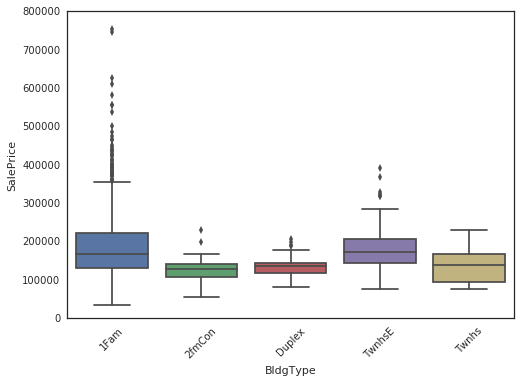

In [12]:
sns.boxplot(x = 'BldgType', y = 'SalePrice',  data = train)
xt = plt.xticks(rotation=45)

This is possible also related to floor space

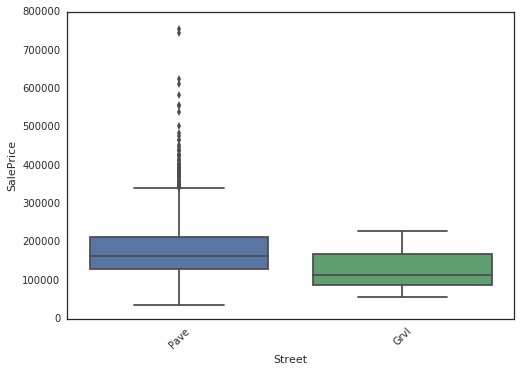

In [13]:
sns.boxplot(x = 'Street', y = 'SalePrice',  data = train)
xt = plt.xticks(rotation=45)

Paved streets seems to imply slightly higher prices.

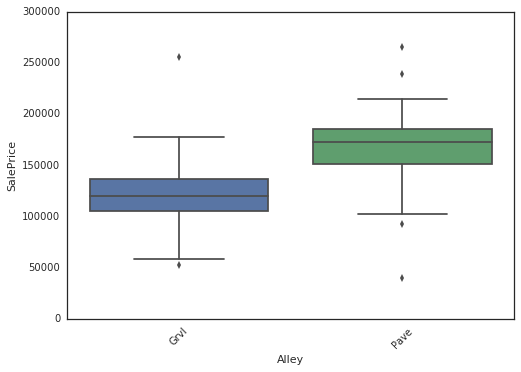

In [14]:
sns.boxplot(x = 'Alley', y = 'SalePrice',  data = train)
xt = plt.xticks(rotation=45)

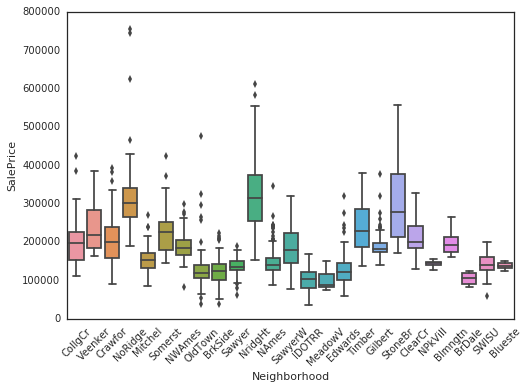

In [15]:
sns.boxplot(x = 'Neighborhood', y = 'SalePrice',  data = train)
xt = plt.xticks(rotation=45)

Sawyer neighborhood seems to be an expensive area. 

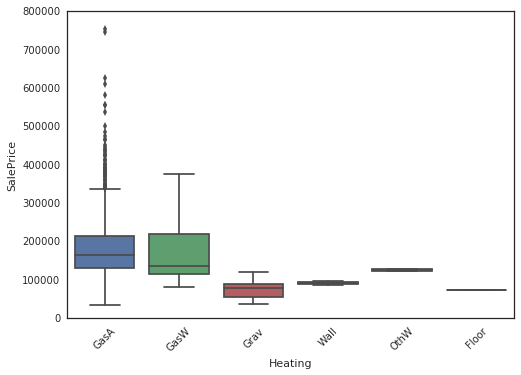

In [16]:
sns.boxplot(x = 'Heating', y = 'SalePrice',  data = train)
xt = plt.xticks(rotation=45)

# Data Cleaning and Factor Engineering

In [52]:
# Combining the train & test data in one data frame
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

In [53]:
## A lot of the data is not normal. To help with that we are taking the log of it.
## ie. SalePrice data has very large values, taking the log(x+1) will help 
## normalize it

train["SalePrice"] = np.log1p(train["SalePrice"])

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
#We should test if the other features are skewed too
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [54]:
# Seperate the categorical variables using dummy variables
all_data = pd.get_dummies(all_data)

In [55]:
# Filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())
all_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [56]:
# Creating matrices:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

In [34]:
# Since the correlations between the highly correlated variables may affect the result a lot,
# we don't want to pick the variables just by the correlations, but use Regularized linear models to select the ones for us.

from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.cross_validation import cross_val_score

## Create a function for evaluating the model
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="mean_squared_error", cv = 5))
    return(rmse)


In [35]:
# First we use Ridge.
model_ridge = Ridge()
# Setting the tuning para for Ridge as following:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
# alpha too small--regularization too strong, less flexible;
# alpha too large--overfit.
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

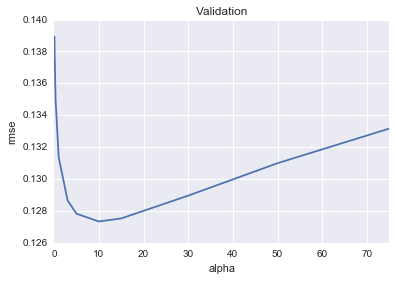

In [36]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [37]:
# from above we can see that the lowest rmse occurs at about alpha = 10.
cv_ridge.min()

0.12733734668670754

In [38]:
# Now try Lasso
# Lasso has a feature that can find the best alpha for us to use
# Use built in CV of lasso here:
# Setting alphas as inverse of ones in Ridget:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)

In [39]:
rmse_cv(model_lasso).mean()

0.12314421090977432

In [40]:
# the rmse looks good, so we show the coefficient here:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
# We want to know the number of vars that Lasso chose for us:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 110 variables and eliminated the other 178 variables


In [41]:
# Take a look at the coefficients
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

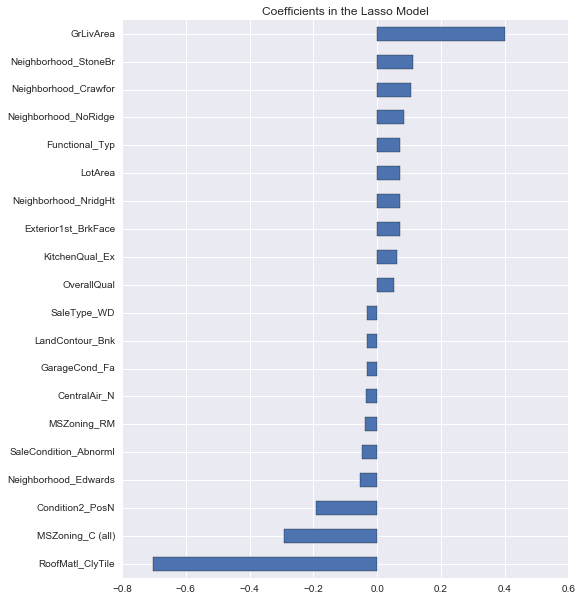

In [42]:
# Plot the coefficients out to see which one is the most important var.
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

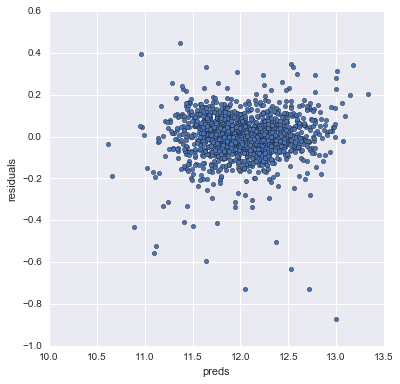

In [43]:
# Check the residuals:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]

preds.plot(x = "preds", y = "residuals",kind = "scatter")

In [44]:
# The residuals looks good--they are symmetrically distributed about 0, 
# tending to cluster towards the middle of the plot, which means this model could be a good fit to our data.

In [44]:
# This will organize the entries of to_check into arrays and calculate the beta values of the regression line.

data_to_lists = [train[column] for column in list(to_check.columns)]
organized_lists = []
for i in range(0, len(data_to_lists[0])):
    temp = []
    for j in range(0, 5):
        temp.append(int(data_to_lists[j][i]))
    organized_lists.append(temp)

sale_prices = train['SalePrice']
sale_prices_list = [int(price) for price in sale_prices]

X = np.array(organized_lists)
y = np.array(sale_prices_list)

betas = np.linalg.inv(X.T @ X) @ X.T @ y

print(betas)

KeyError: 'Neighborhood_price'

In [19]:
# This will calculate the RMSE of betas.

y_hat = X @ betas

diffs = y_hat - y
diffs_squared = [i ** 2 for i in diffs]

rmse = ((sum(diffs_squared)) / len(diffs_squared)) ** (1/2)
print(rmse)

NameError: name 'X' is not defined

In [20]:
# This will calculate the OLS regression.

local_train, local_test = train_test_split(train.loc[0:, ['SalePrice', 'Neighborhood_price', 'Floors', 'years_since06', 'kitchen_ranking', 'fire_rank']], test_size=0.2, random_state=1111)

local_train_y = local_train["SalePrice"]
local_train_x = local_train.drop(["SalePrice"],axis=1)
local_test_y = local_test["SalePrice"]
local_test_x = local_test.drop("SalePrice",axis=1)

clf = sm.OLS(local_train_y.astype(float),local_train_x.astype(float))
result = clf.fit()
preds = result.predict(local_test_x.astype(float))

print(preds)

ValueError: On entry to DLASCL parameter number 5 had an illegal value

In [21]:
# This will calculate the RMSE of the predictions.

diffs = local_test_y - preds
diffs_squared = [i ** 2 for i in diffs]

rmse = ((sum(diffs_squared)) / len(diffs_squared)) ** (1/2)
print(rmse)

C:\Anaconda3\lib\site-packages\pandas\indexes\base.py:2482: RuntimeWarning: unorderable types: str() < int(), sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


TypeError: unsupported operand type(s) for ** or pow(): 'str' and 'int'